# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

# фиксирую сид для воспроизводимости
SEED = 42
np.random.seed(SEED)

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

сиды фиксируем чтобы разбиение train/test, CV, случайные процедуры давали одинаковый результат при повторном запуске, тк иначе метрики плавают

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [ ]:
# задание 1

import numpy as np

SEED = 42

print("train sample (30 rows):")
display(df_train.sample(30, random_state=SEED))

print("\ntest head (5 rows):")
display(df_test.head())

print("\ntest tail (5 rows):")
display(df_test.tail())

print("\n--- missing values ---")
na_train = df_train.isna().sum()
na_train = na_train[na_train > 0]
print("train columns with NaN:")
print(na_train)

na_test = df_test.isna().sum()
na_test = na_test[na_test > 0]
print("\ntest columns with NaN:")
print(na_test)

print("\n--- duplicates (full row) ---")
print("train duplicates:", df_train.duplicated().sum())
print("test duplicates:", df_test.duplicated().sum())

train sample (30 rows):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0



test head (5 rows):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0



test tail (5 rows):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0



--- missing values ---
train columns with NaN:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

test columns with NaN:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

--- duplicates (full row) ---
train duplicates: 985
test duplicates: 62


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
# заполняю пропуски медианами

for df in [df_train, df_test]:
    df["mileage"] = pd.to_numeric(df["mileage"].astype(str).str.replace(r"[^0-9.]+", "", regex=True), errors="coerce")
    df["engine"] = pd.to_numeric(df["engine"].astype(str).str.replace(r"[^0-9.]+", "", regex=True), errors="coerce")
    df["max_power"] = pd.to_numeric(df["max_power"].astype(str).str.replace(r"[^0-9.]+", "", regex=True), errors="coerce")

df_train = df_train.drop(columns=["torque"], errors="ignore")
df_test = df_test.drop(columns=["torque"], errors="ignore")

num_cols = df_train.select_dtypes(include=["number"]).columns.tolist()
medians = df_train[num_cols].median()

df_train[num_cols] = df_train[num_cols].fillna(medians)
df_test[num_cols] = df_test[num_cols].fillna(medians)

print("NaN in train:", df_train.isna().sum().sum())
print("NaN in test:", df_test.isna().sum().sum())
print("train columns with NaN:", df_train.columns[df_train.isna().any()].tolist())
print("test columns with NaN:", df_test.columns[df_test.isna().any()].tolist())

NaN in train: 0
NaN in test: 0
train columns with NaN: []
test columns with NaN: []


1 вопрос:
я могу понять общий вид данных, то какие есть колонки, как выглядят значения, есть ли какие-то странные форматы (единицы измерения, лишние пробелы) примерно какие категории встречаются, нет ли битых строк в начале/конце
но по этим строкам нельзя делать выводы про распределения признаков и таргета

2 вопрос:
не всегда достаточно. duplicated ищет только полные одинаковые строки, а бывают почти дубли. например совпадают все признаки, но отличается одна колонка или значения записаны чуть по-разному

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
# задание 2

# определяю таргет
if "selling_price" in df_train.columns:
    TARGET = "selling_price"
elif "price" in df_train.columns:
    TARGET = "price"
else:
    raise ValueError("не нашел колонку с таргетом (ожидал selling_price или price)")

feat_cols = [c for c in df_train.columns if c != TARGET]

# сколько строк участвуют в дублях по признакам
dup_mask = df_train.duplicated(subset=feat_cols, keep=False)
print("сколько строк в дублях по признакам:", dup_mask.sum())

dup_rows = df_train.loc[dup_mask].sort_values(by=feat_cols)
display(dup_rows.head(30))

before_shape = df_train.shape
df_train = df_train.drop_duplicates(subset=feat_cols, keep="first")

# сбрасываю индекс
df_train = df_train.reset_index(drop=True)

after_shape = df_train.shape
print("shape было:", before_shape)
print("shape стало:", after_shape)
print("индексы теперь от 0 до:", df_train.index.max())

сколько строк в дублях по признакам: 1799


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0


shape было: (6999, 12)
shape стало: (5840, 12)
индексы теперь от 0 до: 5839


In [ ]:
assert df_train.shape == (5840, 12)

я проверил дубликаты по признакам без таргета: нашёл N строк, относящихся к дублям
удалил повторы, оставивил первую запись, затем сбросил индекс

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
# задание 3

cols = ["mileage", "engine", "max_power"]

for df in [df_train, df_test]:
    for c in cols:
        df[c] = df[c].astype(str).str.replace(r"[^0-9.]+", "", regex=True)
        df[c] = pd.to_numeric(df[c], errors="coerce").astype(float)

df_train = df_train.drop(columns=["torque"], errors="ignore")
df_test = df_test.drop(columns=["torque"], errors="ignore")

print(df_train[cols].dtypes)
print(df_test[cols].dtypes)
print("torque in train:", "torque" in df_train.columns)
print("torque in test:", "torque" in df_test.columns)

mileage      float64
engine       float64
max_power    float64
dtype: object
mileage      float64
engine       float64
max_power    float64
dtype: object
torque in train: False
torque in test: False


убрал единицы измерения из mileage/engine/max_power, привёл их к float и удалил torque в обоих датасетах

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
# задание 4

for df in [df_train, df_test]:
    df["engine"] = df["engine"].astype(int)
    df["seats"] = df["seats"].astype(int)

print(df_train[["engine", "seats"]].dtypes)
print(df_test[["engine", "seats"]].dtypes)

engine    int64
seats     int64
dtype: object
engine    int64
seats     int64
dtype: object


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
# задание 5

print("train numeric describe:")
display(df_train.describe())

print("test numeric describe:")
display(df_test.describe())

print("train categorical describe:")
display(df_train.describe(include=["object"]))

print("test categorical describe:")
display(df_test.describe(include=["object"]))

assert df_train.shape == (5840, 12)

train numeric describe:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


test numeric describe:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


train categorical describe:


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


test categorical describe:


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [ ]:
assert df_train.shape == (5840, 12)

по числовым признакам увидел диапазоны значений и разброс (min/max, среднее, квартили)

по категориальным признакам количество уникальных значений и самые частые категории (top/freq)

train и test выглядят похожими по базовым статистикам, сильных отличий на этом шаге не заметил

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

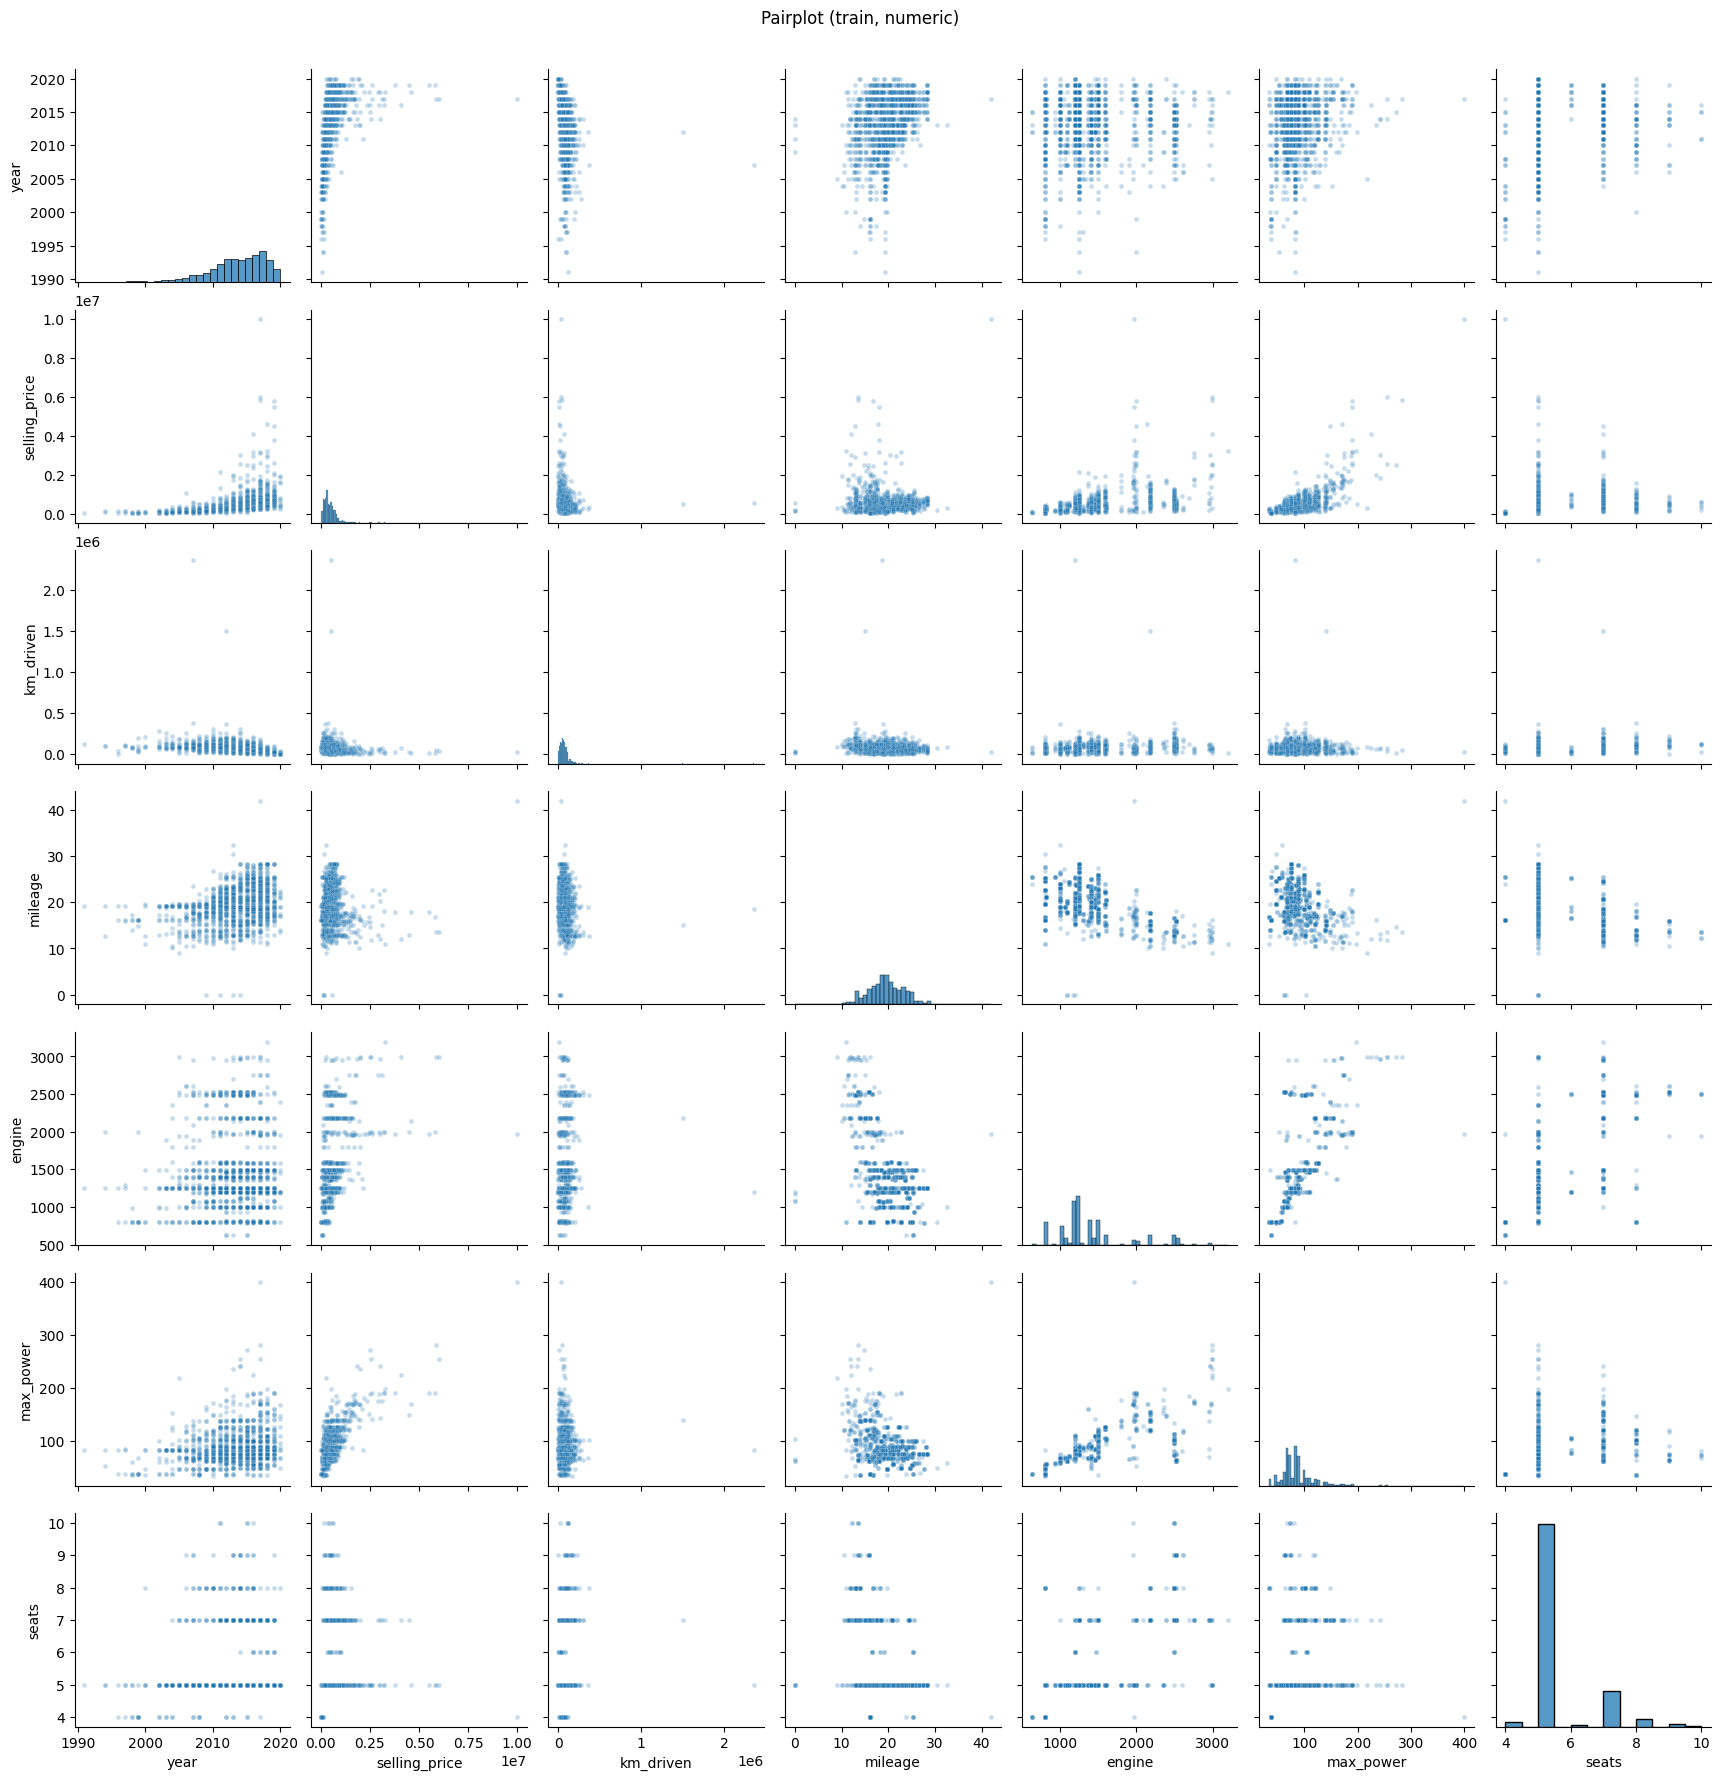

In [ ]:
# задание 6

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_cols_train = df_train.select_dtypes(include=[np.number]).columns.tolist()

df_train_pair = df_train[num_cols_train].sample(
    n=min(1500, len(df_train)),
    random_state=42
).copy()

df_train_pair = df_train_pair.replace([np.inf, -np.inf], np.nan).dropna()

sns.pairplot(
    df_train_pair,
    diag_kind="hist",
    plot_kws={"alpha": 0.25, "s": 12}
)
plt.suptitle("Pairplot (train, numeric)", y=1.02)
plt.show()

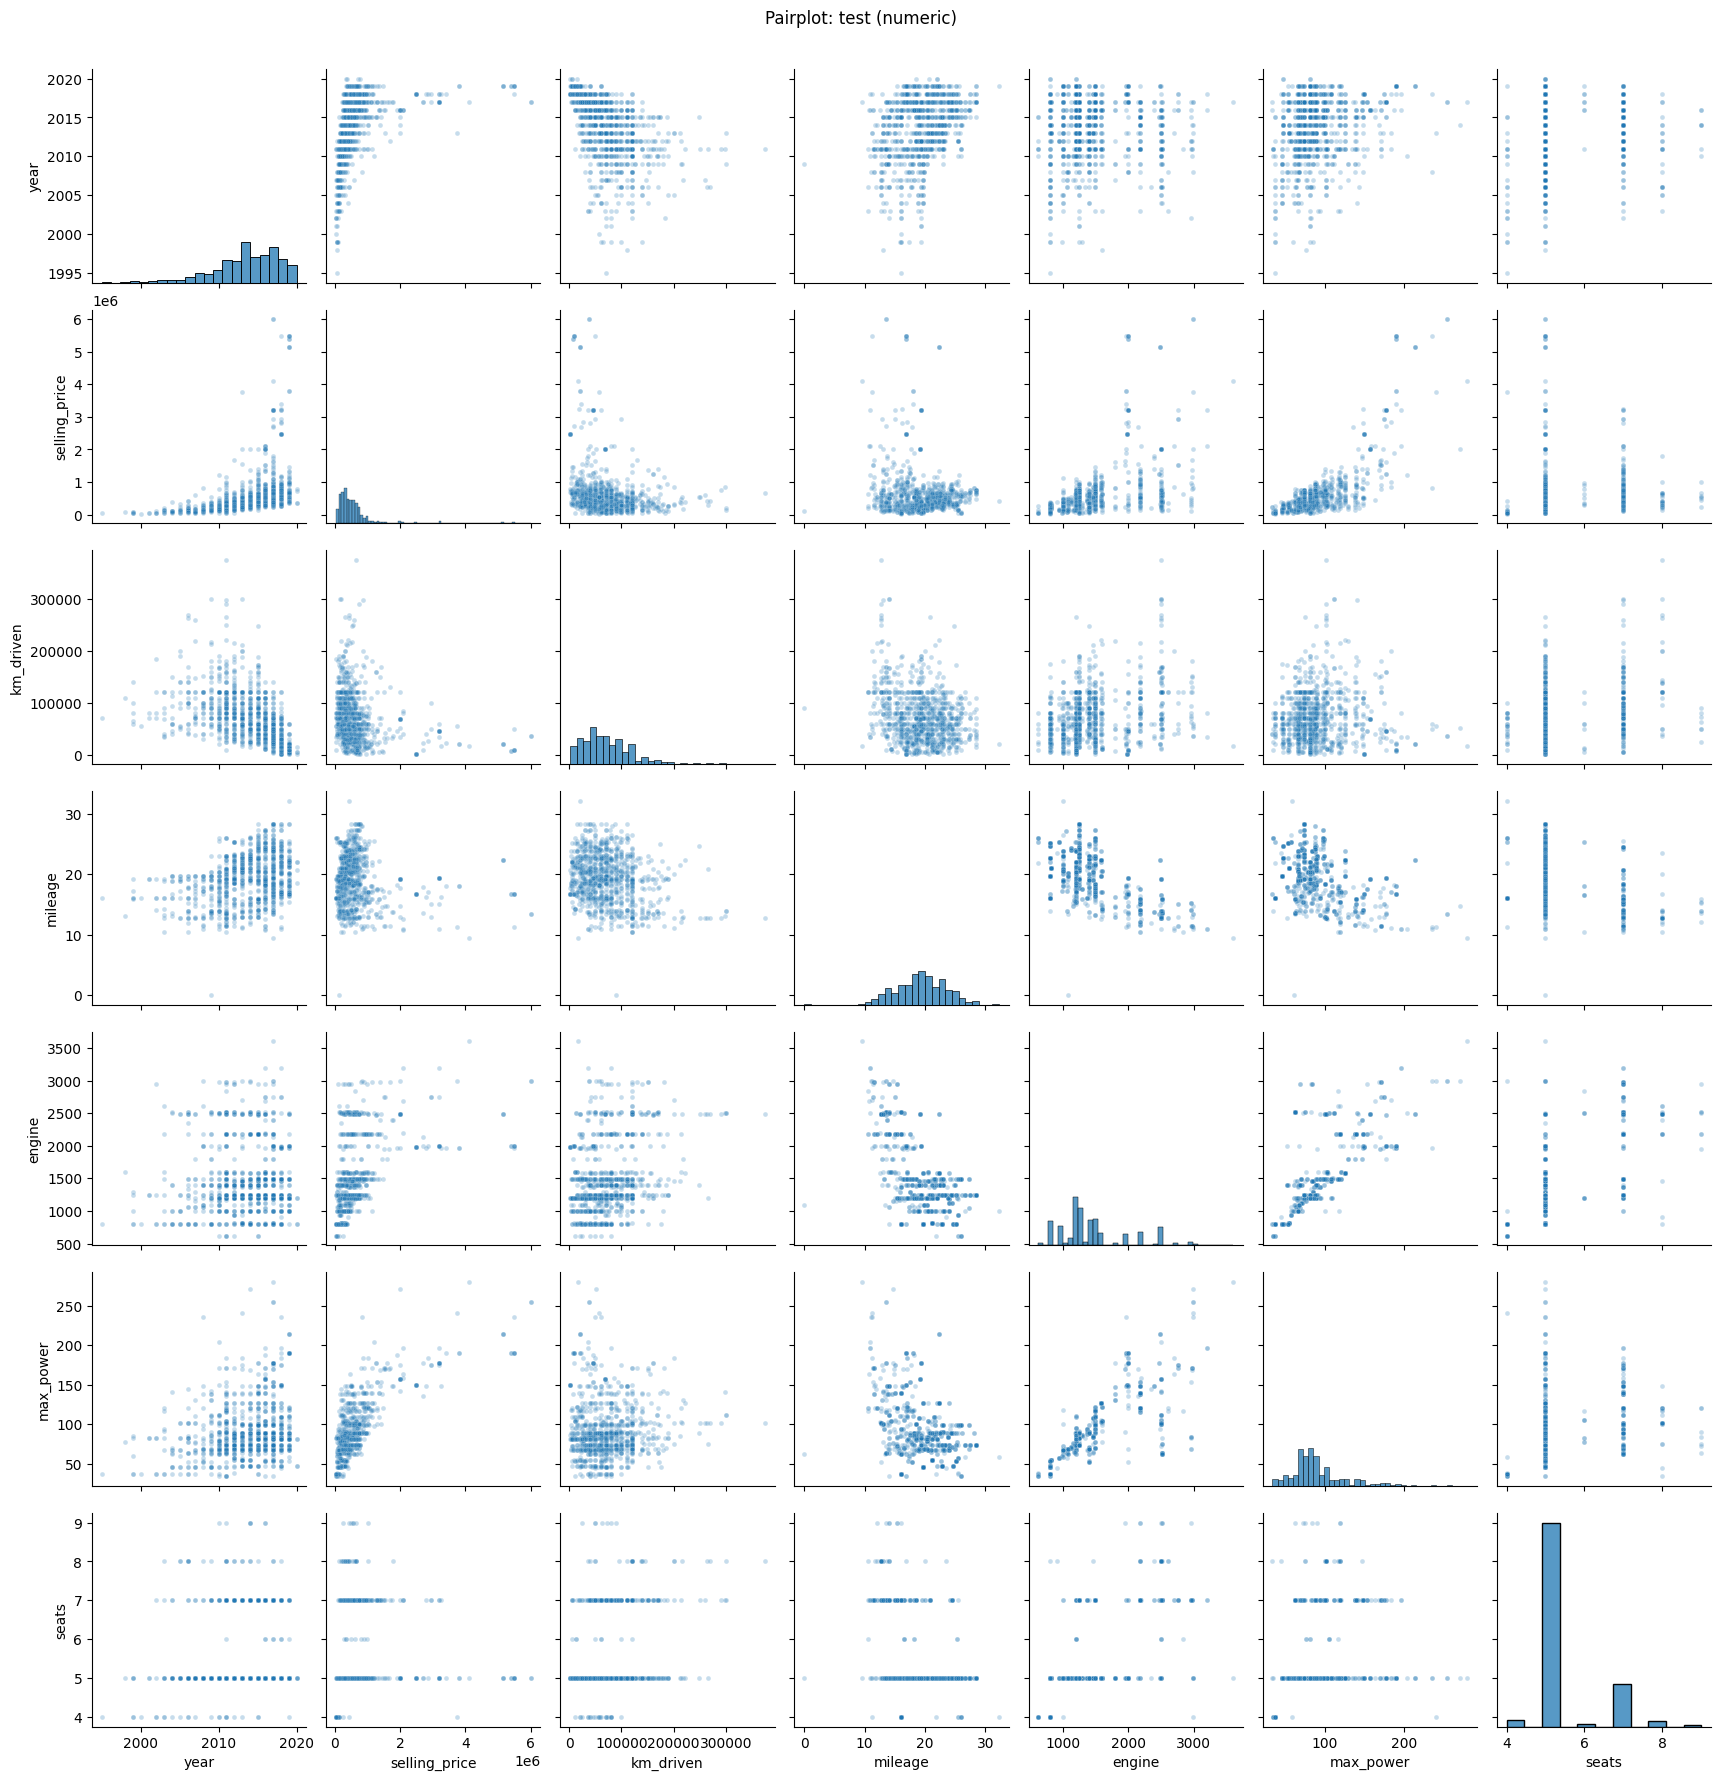

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_cols = df_test.select_dtypes(include=[np.number]).columns

df_test_pair = df_test[num_cols].sample(n=min(1500, len(df_test)), random_state=42)
df_test_pair = df_test_pair.replace([np.inf, -np.inf], np.nan).dropna()

sns.pairplot(df_test_pair, diag_kind="hist", plot_kws={"alpha": 0.25, "s": 12})
plt.suptitle("Pairplot: test (numeric)", y=1.02)
plt.show()

цена чаще выше у более новых машин и у машин с большей мощностью. пробег чаще связан с ценой наоборот, чем больше пробег, тем ниже цена, но разброс большой. видно, что engine и max_power сильно связаны между собой

в тесте картина почти такая же, основные связи выглядят одинаково и в целом train и test похожи, явного сдвига распределений не видно

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


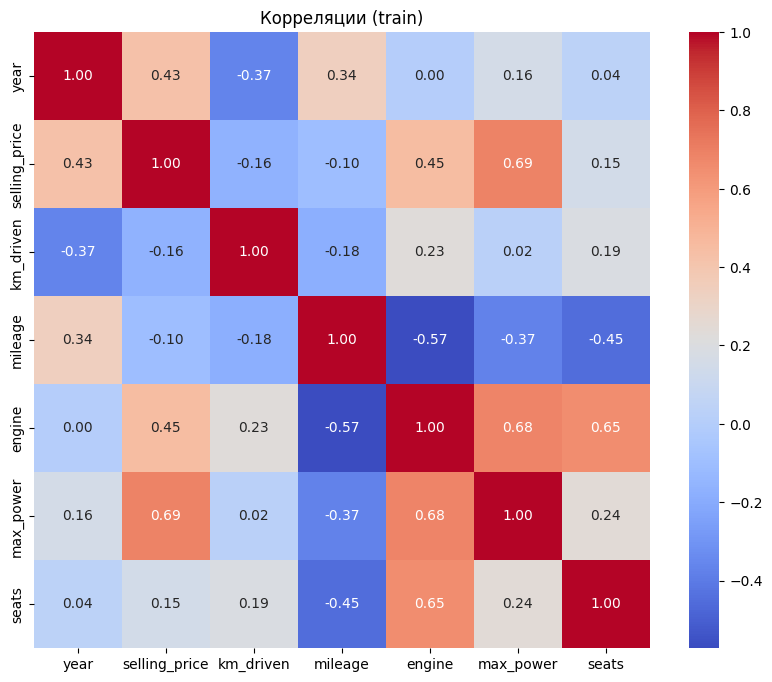

In [ ]:
# задание 7

import seaborn as sns
import matplotlib.pyplot as plt

corr_train = df_train.select_dtypes(include="number").corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_train, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляции (train)")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

наименее скоррелирвоаны между собой признаки, где значение в heatmap ближе всего к нулю, у меня это примерно mileage и seats

сильная положительная линейная зависимость есть между engine и max_power, также у year и selling_price видно положительное направление

про год и пробег в целом похоже на правду, тк year и km_driven обычно имеют отрицательную корреляцию, то есть чем старше машина, тем чаще у нее больше пробег, но это не жесткое правило, тк разброс большой

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [ ]:
y_train = df_train["selling_price"].copy()
X_train = df_train.select_dtypes(include="number").drop(columns=["selling_price"]).copy()

In [ ]:
print("Числовые признаки для модели:", list(X_train.columns))

Числовые признаки для модели: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']


In [ ]:
y_test = df_test["selling_price"].copy()
X_test = df_test.select_dtypes(include="number").drop(columns=["selling_price"]).copy()

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
# задание 9

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# обучаю
lr = LinearRegression()
lr.fit(X_train, y_train)

# предсказания
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# метрики
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)

print(f"R2 train: {r2_train:.4f}, R2 test: {r2_test:.4f}")
print(f"MSE train: {mse_train:.2f}, MSE test: {mse_test:.2f}")

R2 train: 0.5923, R2 test: 0.5941
MSE train: 116873067751.52, MSE test: 233297548204.61


R2 на трейн и тест почти одинаковый (около 0.59), так что явного переобучения не видно. MSE на тесте выше, но это было ожидаемо из за большого масштаба цены и выбросов. для базовой линейной модели получилось вполне адекватно

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
# задание 10

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

scaler = StandardScaler()

# fit только на train, чтобы не подсматривать в test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_pred_train = lr_scaled.predict(X_train_scaled)
y_pred_test = lr_scaled.predict(X_test_scaled)

print(f"R2 train: {r2_score(y_train, y_pred_train):.4f}, R2 test: {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE train: {MSE(y_train, y_pred_train):.2f}, MSE test: {MSE(y_test, y_pred_test):.2f}")

R2 train: 0.5923, R2 test: 0.5941
MSE train: 116873067751.52, MSE test: 233297548204.60


R2 на трейне и тесте остались примерно одинаковыми, разрыва нет, значит явного переобучения тут не видно

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
# задание 11

import pandas as pd

feature_names = X_train.columns

coefs = pd.Series(lr_scaled.coef_, index=feature_names).sort_values(key=lambda x: x.abs(), ascending=False)

print("Топ коэффициентов по модулю:")
display(coefs.head(10))

most_important_feature = coefs.abs().idxmax()
print("Самый информативный признак по модулю коэффициента:", most_important_feature)

Топ коэффициентов по модулю:


,0
max_power,322779.703236
year,152843.262358
engine,61176.857150
km_driven,-44148.047511
mileage,28781.086595
seats,-23220.570226


Самый информативный признак по модулю коэффициента: max_power


наиболее информативный признак в предсказании цены по этой модели это max_power, тк у него самый большой коэффициент по модулю после стандартизации

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
# задание 12

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error as MSE

# беру уже стандартизованные признаки из задания 10
lasso = Lasso(max_iter=10000)  # увеличил итерации, чтобы точно сошлось
lasso.fit(X_train_scaled, y_train)

# предсказания на train и test
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

# метрики качества
print(f"R2 train: {r2_score(y_train, y_pred_train):.4f}, R2 test: {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE train: {MSE(y_train, y_pred_train):.2f}, MSE test: {MSE(y_test, y_pred_test):.2f}")

R2 train: 0.5923, R2 test: 0.5941
MSE train: 116873067761.64, MSE test: 233298219170.76


In [ ]:
import numpy as np
import pandas as pd

feature_names = X_train.columns if hasattr(X_train, "columns") else [f"f{i}" for i in range(len(lasso.coef_))]

coefs = pd.Series(lasso.coef_, index=feature_names)

# сколько коэффициентов стало ровно или близко к 0
n_zero = int(np.isclose(coefs.values, 0).sum())
print("Сколько коэффициентов занулилось:", n_zero, "из", len(coefs))

# гляну на самые большие по модулю коэффициенты
display(coefs.abs().sort_values(ascending=False).head(10))

if n_zero > 0:
    display(coefs[coefs == 0].head(10))

Сколько коэффициентов занулилось: 0 из 6


,0
max_power,322780.586197
year,152843.083853
engine,61172.025780
km_driven,44146.918538
mileage,28779.204085
seats,23217.693273


по качеству Lasso почти не отличается от обычной линейной регрессии- R2 на трейн и тест остались примерно те же, MSE тоже

считаю это нормально, регуляризация не обязана улучшать метрики, она все таки скорее про сдерживание весов и устойчивость

L1 с дефолтными параметрами у меня ничего не занулила. занулилось 0 коэффициентов из 6. скорее всего потому, что признаков мало и почти все несут информацию, а стандартный alpha у Lasso не такой сильный, чтоб начать рубить веса в ноль. если увеличить alpha, то нули могут появиться

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error as MSE
import numpy as np
import pandas as pd

In [ ]:
# беру имена фичей
if hasattr(X_train, "columns"):
    feature_names = X_train.columns
else:
    feature_names = [f"f{i}" for i in range(X_train_scaled.shape[1])]

# сетка по alpha
alphas = np.logspace(-4, 2, 25)

lasso = Lasso(max_iter=20000, random_state=42)

grid_lasso = GridSearchCV(
    estimator=lasso,
    param_grid={"alpha": alphas},
    cv=10,
    scoring="r2",
    n_jobs=-1
)

grid_lasso.fit(X_train_scaled, y_train)

best_lasso = grid_lasso.best_estimator_
print("best alpha:", grid_lasso.best_params_["alpha"])
print("best CV score (r2):", grid_lasso.best_score_)

# метрики на train/test для лучшей модели
y_pred_train = best_lasso.predict(X_train_scaled)
y_pred_test = best_lasso.predict(X_test_scaled)

print(f"R2 train: {r2_score(y_train, y_pred_train):.4f}, R2 test: {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE train: {MSE(y_train, y_pred_train):.2f}, MSE test: {MSE(y_test, y_pred_test):.2f}")

# сколько моделей обучили
n_candidates = len(alphas)
n_fits_cv = n_candidates * 10
print(f"grid fits: {n_fits_cv} (это {n_candidates} alpha * 10 фолдов)")

# проверяю зануления
coefs = pd.Series(best_lasso.coef_, index=feature_names)
n_zeros = int((coefs == 0).sum())
print(f"сколько коэффициентов занулилось: {n_zeros} из {len(coefs)}")

if n_zeros > 0:
    print("какие фичи занулились (первые 10):")
    display(coefs[coefs == 0].head(10))

best alpha: 100.0
best CV score (r2): 0.5682328004899914
R2 train: 0.5923, R2 test: 0.5940
MSE train: 116873166388.83, MSE test: 233364631456.10
grid fits: 250 (это 25 alpha * 10 фолдов)
сколько коэффициентов занулилось: 0 из 6


в грид-серче получилось 250 обучений, тк я перебирал 25 значений alpha и делал 10 фолдов. лучшая регуляризация по сетке вышла alpha = 100.0, при этом коэффициенты не занулились вообще

 думаю так получилось потому что признаков мало и они все реально влияют, а еще alpha не настолько жесткая, чтобы начать обнулять веса в такой постановке. по качеству на тест почти ничего не изменилось по сравнению с обычной линейной регрессией

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error as MSE
import numpy as np
import pandas as pd

if hasattr(X_train, "columns"):
    feature_names = X_train.columns
else:
    feature_names = [f"f{i}" for i in range(X_train_scaled.shape[1])]

alphas = np.logspace(-4, 2, 20)
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]

enet = ElasticNet(max_iter=30000, random_state=42)

grid_enet = GridSearchCV(
    estimator=enet,
    param_grid={"alpha": alphas, "l1_ratio": l1_ratios},
    cv=10,
    scoring="r2",
    n_jobs=-1
)

grid_enet.fit(X_train_scaled, y_train)

best_enet = grid_enet.best_estimator_
print("best params:", grid_enet.best_params_)
print("best CV score (r2):", grid_enet.best_score_)

y_pred_train = best_enet.predict(X_train_scaled)
y_pred_test = best_enet.predict(X_test_scaled)

print(f"R2 train: {r2_score(y_train, y_pred_train):.4f}, R2 test: {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE train: {MSE(y_train, y_pred_train):.2f}, MSE test: {MSE(y_test, y_pred_test):.2f}")

# сколько обучений было в CV
n_candidates = len(alphas) * len(l1_ratios)
n_fits_cv = n_candidates * 10
print(f"grid fits: {n_fits_cv} (это {len(alphas)} alpha * {len(l1_ratios)} l1_ratio * 10 фолдов)")

# зануления у лучшей модели
coefs = pd.Series(best_enet.coef_, index=feature_names)
n_zeros = int((coefs == 0).sum())
print(f"сколько коэффициентов занулилось: {n_zeros} из {len(coefs)}")

best params: {'alpha': np.float64(0.29763514416313164), 'l1_ratio': 0.5}
best CV score (r2): 0.5767754867184463
R2 train: 0.5846, R2 test: 0.5618
MSE train: 119059710602.86, MSE test: 251903848960.45
grid fits: 1400 (это 20 alpha * 7 l1_ratio * 10 фолдов)
сколько коэффициентов занулилось: 0 из 6


грид-серч обучил 1400 моделей, было 20 значений alpha, 7 значений l1_ratio и 10 фолдов. лучшие параметры получились alpha 0.2976 и l1_ratio 0.5. занулений коэффициентов тоже не появилось

по метрикам у меня чуть хуже, чем у линейной регрессии, регуляризация здесь скорее не дает выигрыша, но это нормально, она не должна улучшать качество

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# задание 14
df_train_cat = df_train.copy()
df_test_cat = df_test.copy()

# бонус
df_train_cat["brand"] = df_train_cat["name"].astype(str).str.split().str[0].str.lower()
df_test_cat["brand"] = df_test_cat["name"].astype(str).str.split().str[0].str.lower()

df_train_cat = df_train_cat.drop(columns=["name"])
df_test_cat = df_test_cat.drop(columns=["name"])

# дальше X y
y_train_cat = df_train_cat["selling_price"]
X_train_cat = df_train_cat.drop(columns=["selling_price"])

y_test_cat = df_test_cat["selling_price"]
X_test_cat = df_test_cat.drop(columns=["selling_price"])


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [ ]:
# assert X_train_cat.shape == (5840, 10) # не проходит, добавил brand из name


In [ ]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,brand
count,5840,5840,5840,5840,5840
unique,4,3,2,5,30
top,Diesel,Individual,Manual,First Owner,maruti
freq,3177,5223,5336,3603,1804


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
# задание 15
# делаю через pandas.get_dummies

cat_cols = X_train_cat.select_dtypes(include=["object"]).columns.tolist()
cols_to_ohe = cat_cols + ["seats"]  # seats тоже кодирую

X_train_ohe = pd.get_dummies(X_train_cat, columns=cols_to_ohe, drop_first=True)
X_test_ohe = pd.get_dummies(X_test_cat, columns=cols_to_ohe, drop_first=True)

# чтобы в трейн/тест были одинаковые колонки
X_test_ohe = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

print("X_train_ohe shape:", X_train_ohe.shape)
print("X_test_ohe shape:", X_test_ohe.shape)


X_train_ohe shape: (5840, 52)
X_test_ohe shape: (1000, 52)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
# задание 16

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error as MSE
import numpy as np

# беру уже one-hot данные из задания 15
X_train = X_train_ohe
X_test = X_test_ohe
y_train = y_train_cat
y_test = y_test_cat

# сетка логарифмическая, чтобы быстро покрыть разные масштабы
alphas = np.logspace(-3, 3, 25)

ridge = Ridge(random_state=42)

grid = GridSearchCV(
    ridge,
    param_grid={"alpha": alphas},
    scoring="r2",
    cv=10,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("best alpha:", grid.best_params_["alpha"])
print("best CV score (r2):", grid.best_score_)
print("grid fits:", len(alphas) * 10)

best_ridge = grid.best_estimator_

y_pred_train = best_ridge.predict(X_train)
y_pred_test = best_ridge.predict(X_test)

print(f"R2 train: {r2_score(y_train, y_pred_train):.4f}, R2 test: {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE train: {MSE(y_train, y_pred_train):.2f}, MSE test: {MSE(y_test, y_pred_test):.2f}")


best alpha: 1.7782794100389228
best CV score (r2): 0.7111690019655809
grid fits: 250
R2 train: 0.7676, R2 test: 0.7740
MSE train: 66608628493.01, MSE test: 129925358440.15


тут качество получилось улучшить. лучший alpha получился примерно 1.78, грид обучил 250 моделей, это 25 значений alpha на 10 фолдах

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [ ]:
# задание 17

import numpy as np

def business_metric(y_true, y_pred, tol=0.10):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    eps = 1e-9  # чтобы не делить на 0
    rel_err = np.abs(y_pred - y_true) / (np.abs(y_true) + eps)

    return (rel_err <= tol).mean()

results = {}

# 1) модель из задания 9
results["LinearRegression (num)"] = business_metric(y_test, y_pred_test)

# 2) Ridge из задания 16
y_pred_test_ridge = best_ridge.predict(X_test_ohe)
results["Ridge (cat+num)"] = business_metric(y_test_cat, y_pred_test_ridge)

for name, score in results.items():
    print(f"{name}: {score:.4f}")

best_name = max(results, key=results.get)
print("Лучшая по business_metric модель:", best_name, round(results[best_name], 4))

LinearRegression (num): 0.3080
Ridge (cat+num): 0.3080
Лучшая по business_metric модель: LinearRegression (num) 0.308


LinearRegression выбралась просто потому что она первая в словаре, а так у обеих моделей один результат - 0.3080

ничья)

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [104]:
%%writefile app.py
import pickle
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt


@st.cache_resource
def load_artifact(path="model.pkl"):
    with open(path, "rb") as f:
        return pickle.load(f)


def preprocess_input(df, artifact):
    df = df.copy()

    # если прилетел name - делаю brand
    if "name" in df.columns:
        df["brand"] = df["name"].astype(str).str.split().str[0].str.lower()
        df = df.drop(columns=["name"])

    # если brand вообще нет - добавлю как unknown
    if "brand" not in df.columns:
        df["brand"] = "unknown"

    if "selling_price" in df.columns:
        df = df.drop(columns=["selling_price"])

    # привожу колонки, которые ожидаем
    for c in artifact["fill_num"]:
        if c not in df.columns:
            df[c] = np.nan

    for c in artifact["fill_cat"]:
        if c not in df.columns:
            df[c] = np.nan

    # заполняю пропуски
    for c, v in artifact["fill_num"].items():
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(v)

    for c, v in artifact["fill_cat"].items():
        df[c] = df[c].fillna(v).astype(str)

    # one-hot
    df_ohe = pd.get_dummies(df, columns=artifact["cols_to_ohe"], drop_first=True)

    # выравниваю колонки под train
    X = df_ohe.reindex(columns=artifact["ohe_columns"], fill_value=0)

    return X


def plot_eda(df):
    st.write("Пара простых графиков по данным")

    num_cols = [c for c in df.columns if c in ["year", "km_driven", "mileage", "engine", "max_power", "selling_price"]]
    for c in num_cols:
        fig, ax = plt.subplots()
        ax.hist(pd.to_numeric(df[c], errors="coerce").dropna(), bins=30)
        ax.set_title(c)
        st.pyplot(fig)


def plot_coefs(artifact, top_n=15):
    model = artifact["model"]
    coefs = pd.Series(model.coef_, index=artifact["ohe_columns"])
    coefs_abs = coefs.abs().sort_values(ascending=False).head(top_n)
    coefs_top = coefs.loc[coefs_abs.index]

    fig, ax = plt.subplots()
    coefs_top.sort_values().plot(kind="barh", ax=ax)
    ax.set_title("Топ коэффициентов Ridge (по модулю)")
    st.pyplot(fig)


st.set_page_config(page_title="Car price app", layout="wide")
st.title("Прогноз цены авто")

artifact = load_artifact("model.pkl")

tab1, tab2, tab3 = st.tabs(["EDA", "Predict", "Model weights"])

with tab1:
    st.subheader("EDA")
    st.write("Можно загрузить csv и посмотреть базовые графики. Если не загрузить, попробую открыть data/train.csv")

    uploaded = st.file_uploader("Загрузить csv для EDA", type=["csv"])
    if uploaded is not None:
        df_eda = pd.read_csv(uploaded)
        st.dataframe(df_eda.head(10))
        plot_eda(df_eda)
    else:
        try:
            df_eda = pd.read_csv("data/train.csv")
            st.dataframe(df_eda.head(10))
            plot_eda(df_eda)
        except:
            st.info("Нет data/train.csv, загрузи файл для EDA вручную")

with tab2:
    st.subheader("Predict")

    mode = st.radio("Как подать данные", ["Загрузить CSV", "Ввести вручную"])

    if mode == "Загрузить CSV":
        up = st.file_uploader("CSV с признаками", type=["csv"], key="pred_csv")
        if up is not None:
            df_in = pd.read_csv(up)
            st.dataframe(df_in.head(10))

            X = preprocess_input(df_in, artifact)
            preds = artifact["model"].predict(X)

            out = df_in.copy()
            out["pred_price"] = preds
            st.dataframe(out.head(20))

            st.download_button(
                "Скачать результат csv",
                out.to_csv(index=False).encode("utf-8"),
                file_name="predictions.csv",
                mime="text/csv"
            )

    else:
        col1, col2, col3 = st.columns(3)

        with col1:
            year = st.number_input("year", value=2015)
            km_driven = st.number_input("km_driven", value=50000)
            mileage = st.number_input("mileage", value=20.0)

        with col2:
            engine = st.number_input("engine", value=1200)
            max_power = st.number_input("max_power", value=80.0)
            seats = st.selectbox("seats", [4, 5, 6, 7, 8, 9, 10], index=1)

        with col3:
            fuel = st.selectbox("fuel", ["Diesel", "Petrol", "CNG", "LPG"])
            seller_type = st.selectbox("seller_type", ["Individual", "Dealer", "Trustmark Dealer"])
            transmission = st.selectbox("transmission", ["Manual", "Automatic"])
            owner = st.selectbox("owner", ["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"])
            brand = st.text_input("brand", value="maruti")

        df_in = pd.DataFrame([{
            "year": year,
            "km_driven": km_driven,
            "mileage": mileage,
            "engine": engine,
            "max_power": max_power,
            "seats": seats,
            "fuel": fuel,
            "seller_type": seller_type,
            "transmission": transmission,
            "owner": owner,
            "brand": brand
        }])

        X = preprocess_input(df_in, artifact)
        pred = artifact["model"].predict(X)[0]
        st.write("Предсказанная цена:", float(pred))

with tab3:
    st.subheader("Веса модели")
    plot_coefs(artifact, top_n=20)

Writing app.py


# **Часть 6 | Оформление репозитория и оценка сервиса (2 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

In [103]:
import pickle

# сохраняю список колонок, которые получились после one-hot на train
ohe_columns = X_train_ohe.columns.tolist()

# заполнения на всякий случай, чтобы инференс не падал, если где-то пропуск
fill_num = X_train_cat.drop(columns=cols_to_ohe).median(numeric_only=True).to_dict()
fill_cat = {}
for c in cols_to_ohe:
    fill_cat[c] = X_train_cat[c].mode()[0]

artifact = {
    "model": best_ridge,
    "cols_to_ohe": cols_to_ohe,
    "ohe_columns": ohe_columns,
    "fill_num": fill_num,
    "fill_cat": fill_cat
}

with open("model.pkl", "wb") as f:
    pickle.dump(artifact, f)

print("Сохранил model.pkl")

Сохранил model.pkl
